In [1]:
from numba_code_Test6 import *
import matplotlib.pyplot as plt
plt.style.use('default')

## Test 6, full mutant, 5 deme, K=1000, s=0.001/ln(100)

In [2]:
#Parameters unchanged during the notebook
m=0.4
mO=m/2
mI=4*mO
t=np.log(100)
s=0.001/t
fitnesses=np.array([1+s,1])
N_demes=5

Try few simulations in the case K=1000:

In [3]:
#Initial state for the star and clique, mutant in the leaf
in_numbers=np.array([[0.,1000.],[1000.,0.],[0.,1000.],[0.,1000.],[0.,1000.]]).astype(np.int64)
K=1000
nb_cycles=10000
folder=None

#Migration matrix of the star
migration_matrix=define_star(N_demes,mI,mO, equal_contribution=False)

In [15]:
#Fixation probability 
nb_sim=10
star_et, star_ft, star_fp, star_estd, star_fstd, star_estde, star_fstse, fix_times, ex_times = fixation_probability_stat(in_numbers, folder, migration_matrix, fitnesses, nb_sim, nb_cycles, t, K, size_follow_numbers=2500, print_frequency=1, save_dynamics=False)
print(f'Fixation probability on {nb_sim} simulations is {star_fp}, with \n average extinction time {star_et} with std {star_estd} and std error {star_estde} and \n average fixation time {star_ft} with std {star_fstd} and std error {star_fstse}')

Fixation probability on 10 simulations is 1.0, with 
 average extinction time 0 with std 0 and std error 0 and 
 average fixation time 4643.5 with std 1837.0613081767303 and std error 580.9297935206972


The fixation time occours around 4'000 time steps

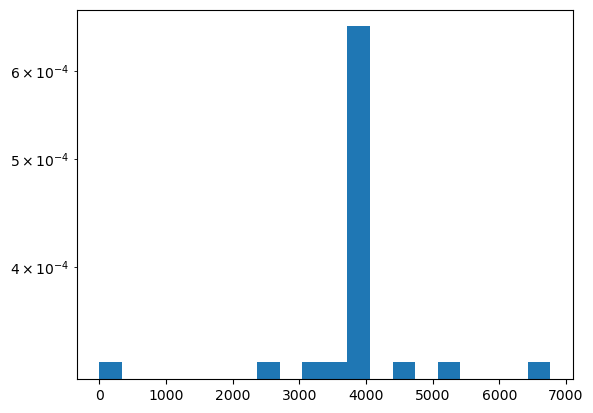

In [9]:
plt.hist(fix_times,density=True, log=True, bins=20)
plt.show()

## 10'000 simulations

- Star, leaf

In [17]:
#Fixation probability 
nb_sim=10000
#folder='Test6-K1000/Star/Leaf'
star_et, star_ft, star_fp, star_estd, star_fstd, star_estde, star_fstse, fix_times_star_leaf, ex_times_star_leaf = fixation_probability_stat(in_numbers, folder, migration_matrix, fitnesses, nb_sim, nb_cycles, t, K, size_follow_numbers=10000, print_frequency=1, save_dynamics=False)
print(f'Fixation probability on {nb_sim} simulations is {star_fp}, with \n average extinction time {star_et} with std {star_estd} and std error {star_estde} and \n average fixation time {star_ft} with std {star_fstd} and std error {star_fstse}')

Fixation probability on 10000 simulations is 0.8929, with 
 average extinction time 1972.609710550887 with std 737.8746786262011 and std error 22.5469536297271 and 
 average fixation time 4591.0552133497595 with std 2330.4986538058347 and std error 24.66308756796537


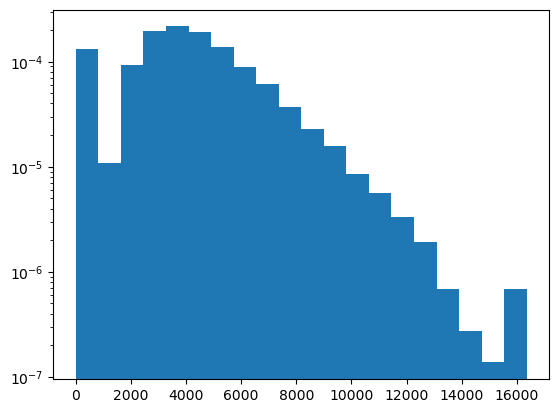

In [18]:
plt.hist(fix_times_star_leaf,density=True, log=True, bins=20)
plt.show()

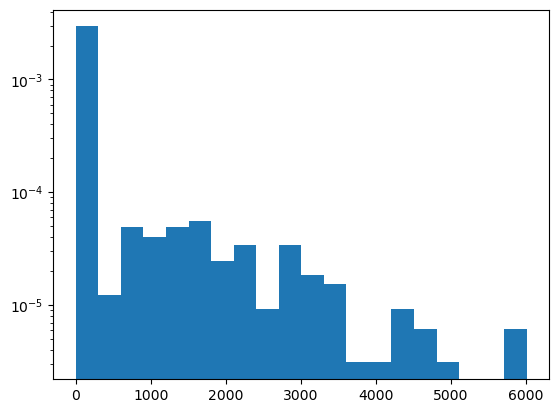

In [19]:
plt.hist(ex_times_star_leaf,density=True, log=True, bins=20)
plt.show()

- Star, center

In [20]:
nb_sim=10000
in_numbers=np.array([[1000.,0.],[0.,1000.],[0.,1000.],[0.,1000.],[0.,1000.]]).astype(np.int64)
#folder='Test6-K1000/Star/Center'
star_center_et, star_center_ft, star_center_fp, star_center_estd, star_center_fstd, star_center_estde, star_center_fstse, fix_times_star_center, ex_times_star_center = fixation_probability_stat(in_numbers, folder, migration_matrix, fitnesses, nb_sim, nb_cycles, t, K, size_follow_numbers=10000, print_frequency=1, save_dynamics=False)
print(f'Fixation probability on {nb_sim} simulations is {star_center_fp}, with \n average extinction time {star_center_et} with std {star_center_estd} and std error {star_center_estde} and \n average fixation time {star_center_ft} with std {star_center_fstd} and std error {star_center_fstse}')

Fixation probability on 10000 simulations is 0.8424, with 
 average extinction time 1783.1300761421319 with std 795.1308843946929 and std error 20.029057624202732 and 
 average fixation time 4829.212962962963 with std 2536.8136273344203 and std error 27.639449119928


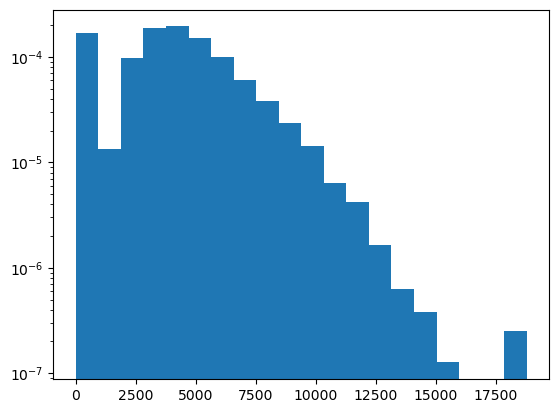

In [24]:
plt.hist(fix_times_star_center,density=True, log=True, bins=20)
plt.show()

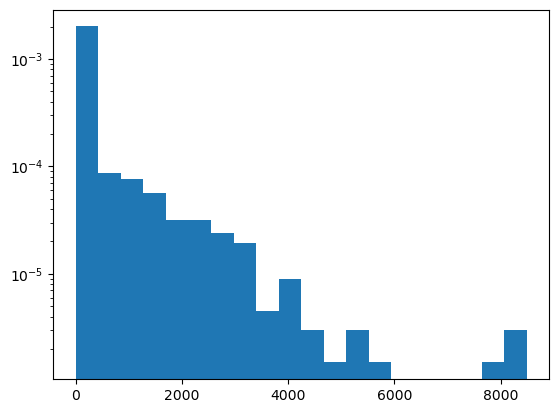

In [25]:
plt.hist(ex_times_star_center,density=True, log=True, bins=20)
plt.show()

- Wm

In [22]:
#folder='Test6-K1000/Wm'

#Migration matrix of the clique
migration_matrix=np.array([[1]])
in_numbers=np.array([[1000.,4000.]]).astype(np.int64)

In [23]:
#Fixation probability 
K=5000
nb_sim=10000
wm_et, wm_ft, wm_fp, wm_estd, wm_fstd, wm_estde, wm_fstse, wm_fix_times, wm_ex_times = fixation_probability_stat(in_numbers, folder, migration_matrix, fitnesses, nb_sim, nb_cycles, t, K, size_follow_numbers=11000, print_frequency=1, save_dynamics=False)
print(f'Fixation probability on {nb_sim} simulations is {wm_fp}, with \n average extinction time {wm_et} with std {wm_estd} and std error {wm_estde} and \n average fixation time {wm_ft} with std {wm_fstd} and std error {wm_fstse}')

Fixation probability on 10000 simulations is 0.8702, with 
 average extinction time 1893.168721109399 with std 773.8990395569542 and std error 21.48062737466545 and 
 average fixation time 4561.681222707423 with std 2408.116693418482 and std error 25.814753881081085


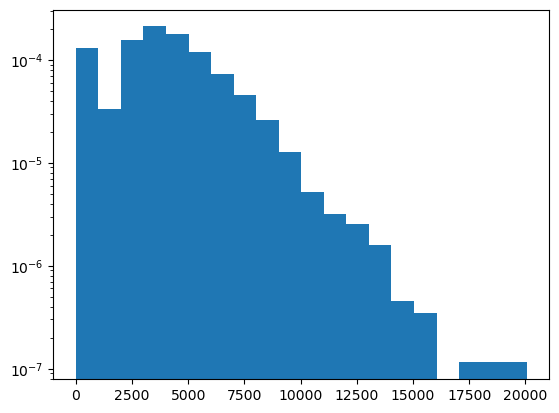

In [36]:
plt.hist(wm_fix_times,density=True, log=True, bins=20)
plt.show()

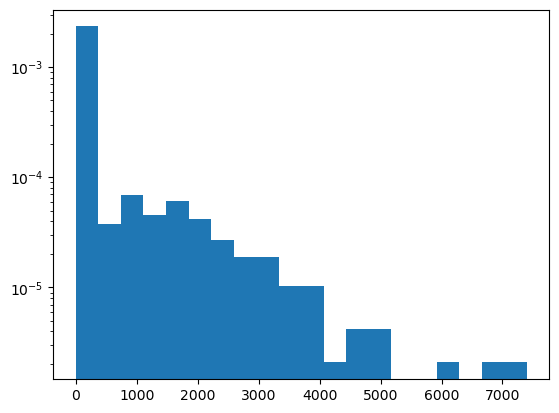

In [26]:
plt.hist(wm_ex_times,density=True, log=True, bins=20)
plt.show()

Plots

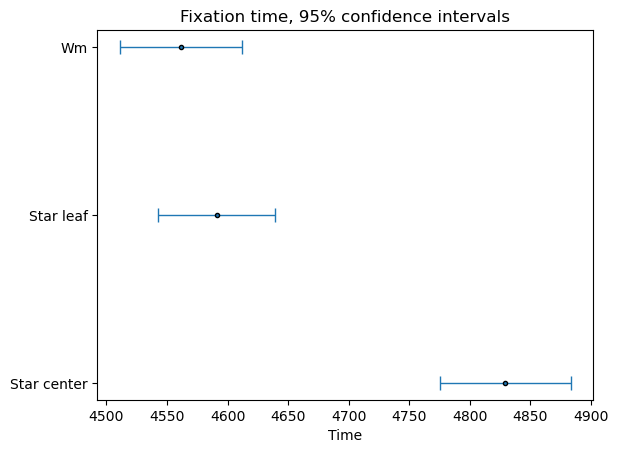

In [28]:
params = ['Star center', 'Star leaf', 'Wm']

mean = np.array([star_center_ft,star_ft, wm_ft])
error = np.array([star_center_fstse,star_fstse, wm_fstse])*1.96


plt.errorbar(mean,np.array(range(len(mean))), xerr=error, linewidth=1, linestyle='none', marker='o', markersize=3, markeredgecolor='black', capsize=5)
plt.yticks(range(len(params)), params)
plt.title('Fixation time, 95% confidence intervals')
plt.xlabel('Time')
plt.show()

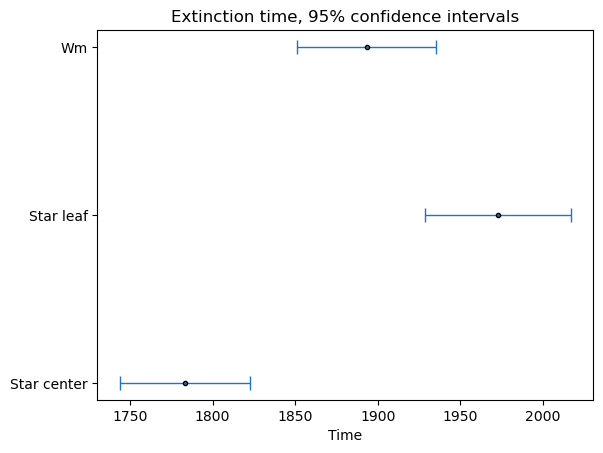

In [31]:
params = ['Star center', 'Star leaf', 'Wm']

mean = np.array([star_center_et,star_et, wm_et])
error = np.array([star_center_estde,star_estde, wm_estde])*1.96


plt.errorbar(mean,np.array(range(len(mean))), xerr=error, linewidth=1, linestyle='none', marker='o', markersize=3, markeredgecolor='black', capsize=5)
plt.yticks(range(len(params)), params)
plt.title('Extinction time, 95% confidence intervals')
plt.xlabel('Time')
plt.show()

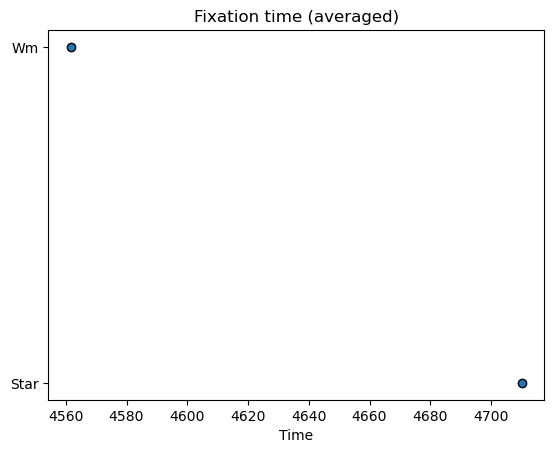

In [34]:
params = ['Star', 'Wm']

star_ft_average = (star_ft + star_center_ft)/2

mean = np.array([star_ft_average, wm_ft])


plt.plot(mean,np.array(range(len(mean))), linewidth=1, linestyle='none', marker='o', markersize=6, markeredgecolor='black')
plt.yticks(range(len(params)), params)
plt.title('Fixation time (averaged)')
plt.xlabel('Time')
plt.show()

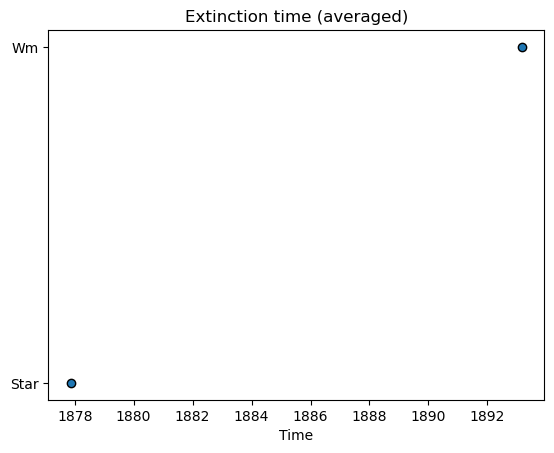

In [35]:
params = ['Star', 'Wm']

star_et_average = (star_et + star_center_et)/2

mean = np.array([star_et_average, wm_et])


plt.plot(mean,np.array(range(len(mean))), linewidth=1, linestyle='none', marker='o', markersize=6, markeredgecolor='black')
plt.yticks(range(len(params)), params)
plt.title('Extinction time (averaged)')
plt.xlabel('Time')
plt.show()

## Load some dynamics

Let's load some of the saved trajectoriesfor extinction and fixation in the configurations: well-mixed, clique and star.

### Plot the mean of the dynamics

In [11]:
def extract_ratio_fix(path,x,n):
    
    deme_dynamics = []
    
    for i in range(n):
        path_sub = path + '/fix_' + str(i+1) + '.npz'
        fix = np.load(path_sub)['arr_0']
        sum_tot = np.sum(fix[:x], axis=1)
        deme_dynamics.append(sum_tot.T[0]/(sum_tot.T[0]+sum_tot.T[1]))
    
    return np.mean(deme_dynamics,axis=0)

def extract_ratio_ex(path,x,n):
    
    deme_dynamics = []
    
    for i in range(n):
        path_sub = path + '/ex_' + str(i) + '.npz'
        fix = np.load(path_sub)['arr_0']
        sum_tot = np.sum(fix[:x], axis=1)
        deme_dynamics.append(sum_tot.T[0]/(sum_tot.T[0]+sum_tot.T[1]))
    
    return np.mean(deme_dynamics,axis=0)

In [12]:
x=9000
path = 'Test6-K1000/'
path_star = path +'Star/'
path_clique = path + 'Clique'
path_wm = path + 'Wm'

star_fix_leaf = extract_ratio_fix(path_star + 'Leaf',x,999)
star_ex_leaf = extract_ratio_ex(path_star + 'Leaf',x,1000)
clique_fix= extract_ratio_fix(path_clique,x,999)
clique_ex = extract_ratio_ex(path_clique,x,1000)

star_fix_center = extract_ratio_fix(path_star + 'Center',x,636)
star_ex_center = extract_ratio_ex(path_star + 'Center',x,1000)


wm_fix = extract_ratio_fix(path_wm,x,999)
wm_ex = extract_ratio_ex(path_wm,x,1000)


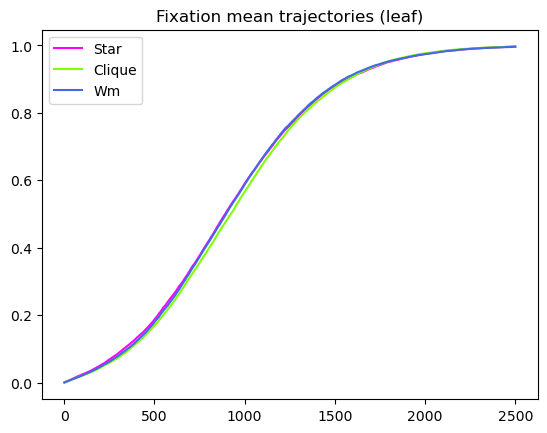

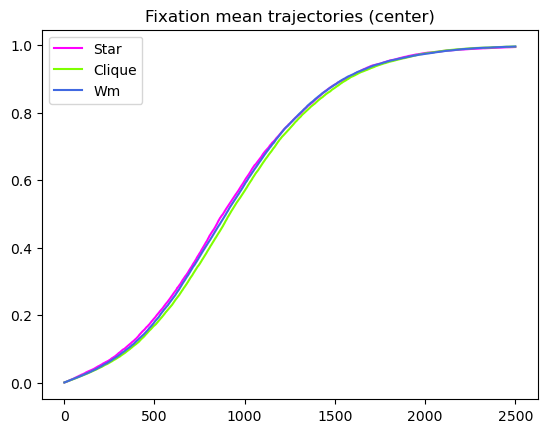

In [64]:
center = 'magenta'
leaf1 = 'chartreuse'
leaf2 = 'royalblue'

plt.plot(np.arange(1,x+1,1),star_fix_leaf,color=center,label='Star leaf')
plt.plot(np.arange(1,x+1,1),clique_fix,color=leaf1,label='Clique')
plt.plot(np.arange(1,x+1,1),wm_fix,color=leaf2,label='Wm')
plt.plot(np.arange(1,x+1,1),star_fix_center,color='darkorange',label='Star center')
plt.title('Fixation mean trajectories')
plt.legend()
plt.show()

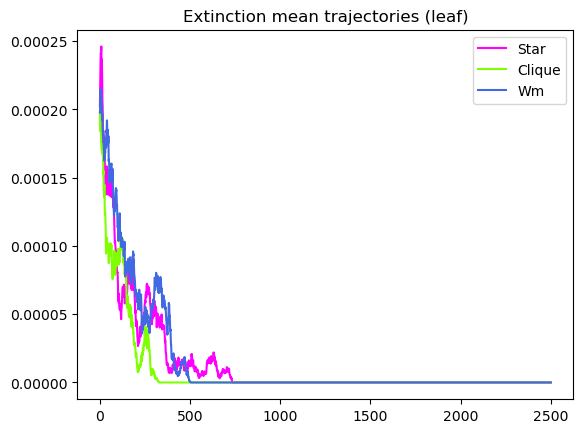

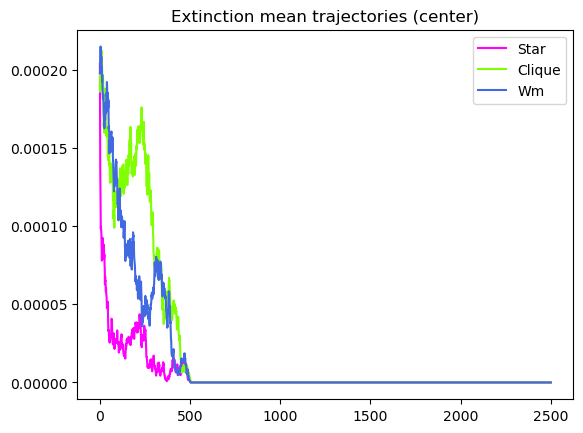

In [66]:
center = 'magenta'
leaf1 = 'chartreuse'
leaf2 = 'royalblue'

plt.plot(np.arange(1,x+1,1),star_ex_leaf,color=center,label='Star leaf')
plt.plot(np.arange(1,x+1,1),clique_ex,color=leaf1,label='Clique')
plt.plot(np.arange(1,x+1,1),wm_ex,color=leaf2,label='Wm')
plt.plot(np.arange(1,x+1,1),star_ex_center,color='darkorange',label='Star center')
plt.title('Extinction mean trajectories')
plt.legend()
plt.show()

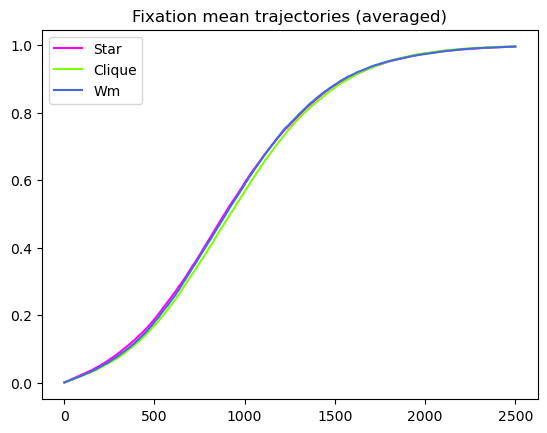

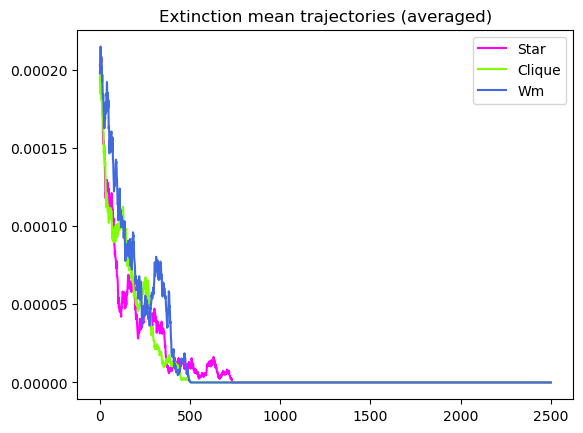

In [71]:
plt.plot(np.arange(1,x+1,1),(star_fix_center+star_fix_leaf)/2,color=center,label='Star')
plt.plot(np.arange(1,x+1,1),clique_fix,color=leaf1,label='Clique')
plt.plot(np.arange(1,x+1,1),wm_fix,color=leaf2,label='Wm')
plt.title('Fixation mean trajectories (averaged)')
plt.legend()
plt.show()

plt.plot(np.arange(1,x+1,1),(star_ex_center+star_ex_leaf)/2,color=center,label='Star')
plt.plot(np.arange(1,x+1,1),clique_ex,color=leaf1,label='Clique')
plt.plot(np.arange(1,x+1,1),wm_ex,color=leaf2,label='Wm')
plt.title('Extinction mean trajectories (averaged)')
plt.legend()
plt.show()

### Plot some dynamics

In [13]:
def extract_ratio_fix(path,x,n):
    
    deme_dynamics = []
    
    for i in range(n):
        path_sub = path + '/fix_' + str(i+1) + '.npz'
        fix = np.load(path_sub)['arr_0']
        sum_tot = np.sum(fix[:x], axis=1)
        deme_dynamics.append(sum_tot.T[0]/(sum_tot.T[0]+sum_tot.T[1]))
    
    return deme_dynamics

def extract_ratio_ex(path,x,n):
    
    deme_dynamics = []
    
    for i in range(n):
        path_sub = path + '/ex_' + str(i) + '.npz'
        fix = np.load(path_sub)['arr_0']
        sum_tot = np.sum(fix[:x], axis=1)
        deme_dynamics.append(sum_tot.T[0]/(sum_tot.T[0]+sum_tot.T[1]))
    
    return deme_dynamics

In [18]:
x=9000
star_fix_leaf_list = extract_ratio_fix(path_star + 'Leaf',x,100)
star_ex_leaf_list = extract_ratio_ex(path_star + 'Leaf',x,100)
clique_fix_list = extract_ratio_fix(path_clique,x,100)
clique_ex_list = extract_ratio_ex(path_clique,x,100)

star_fix_center_list = extract_ratio_fix(path_star + 'Center',x,100)
star_ex_center_list = extract_ratio_ex(path_star + 'Center',x,100)


wm_fix_list = extract_ratio_fix(path_wm,x,100)
wm_ex_list = extract_ratio_ex(path_wm,x,100)


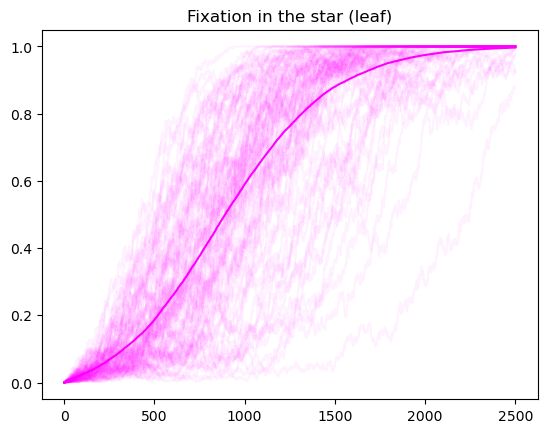

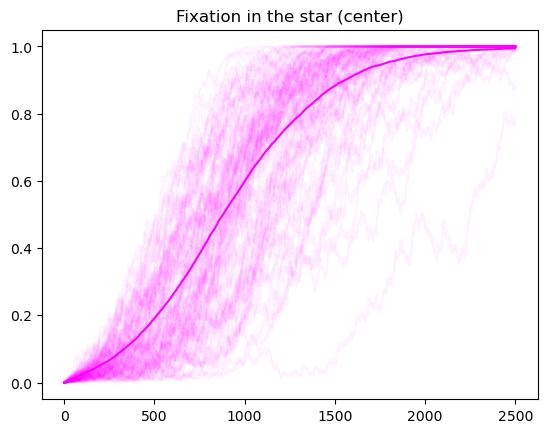

In [22]:
plt.plot(np.arange(1,x+1,1),star_fix_leaf,color=center)
for i in range(100):
    plt.plot(np.arange(1,x+1,1),star_fix_leaf_list[i],color=center,alpha=0.05)
plt.title('Fixation in the star (leaf)')
plt.show()

plt.plot(np.arange(1,x+1,1),star_fix_center,color=center)
for i in range(100):
    plt.plot(np.arange(1,x+1,1),star_fix_center_list[i],color=center,alpha=0.05)
plt.title('Fixation in the star (center)')
plt.show()

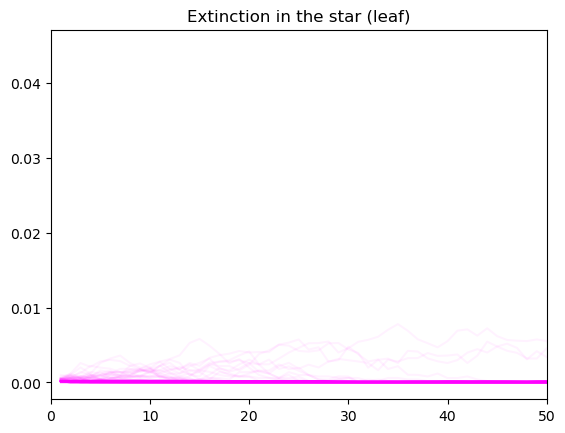

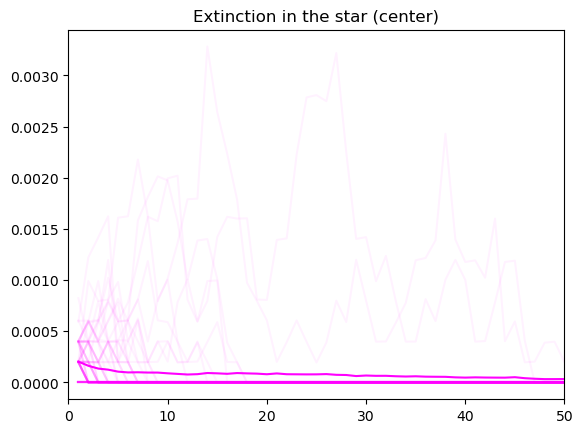

In [25]:
center = 'magenta'
leaf1 = 'chartreuse'
leaf2 = 'royalblue'

plt.plot(np.arange(1,x+1,1),star_ex_leaf,color=center)
for i in range(100):
    plt.plot(np.arange(1,x+1,1),star_ex_leaf_list[i],color=center,alpha=0.05)

plt.xlim(0,50)
plt.title('Extinction in the star (leaf)')
plt.show()

plt.plot(np.arange(1,x+1,1),star_ex_center,color=center)
for i in range(100):
    plt.plot(np.arange(1,x+1,1),star_ex_center_list[i],color=center,alpha=0.05)
plt.xlim(0,50)
plt.title('Extinction in the star (center)')
plt.show()

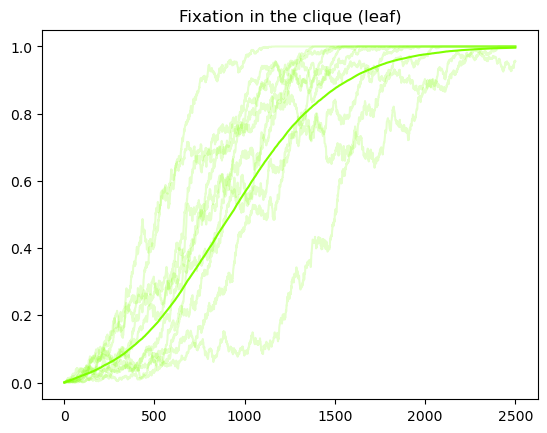

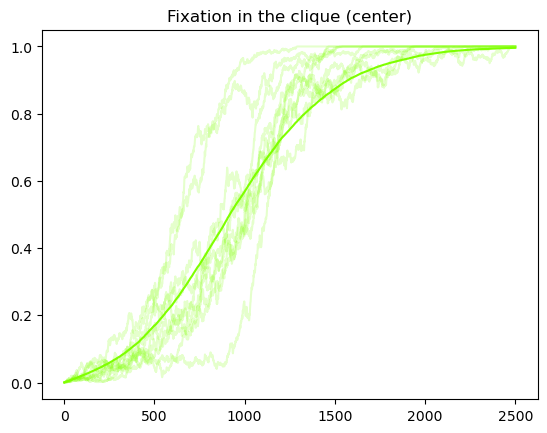

In [90]:
plt.plot(np.arange(1,x+1,1),clique_fix,color=leaf1)
for i in range(10):
    plt.plot(np.arange(1,x+1,1),clique_fix_list[i],color=leaf1,alpha=0.2)
plt.title('Fixation in the clique')
plt.show()

plt.plot(np.arange(1,x+1,1),clique_ex,color=leaf1)
for i in range(10):
    plt.plot(np.arange(1,x+1,1),clique_ex_list[i],color=leaf1,alpha=0.2)
plt.title('Extinction in the clique')
plt.show()

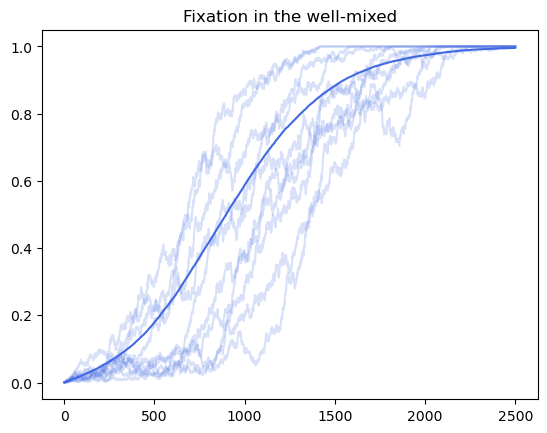

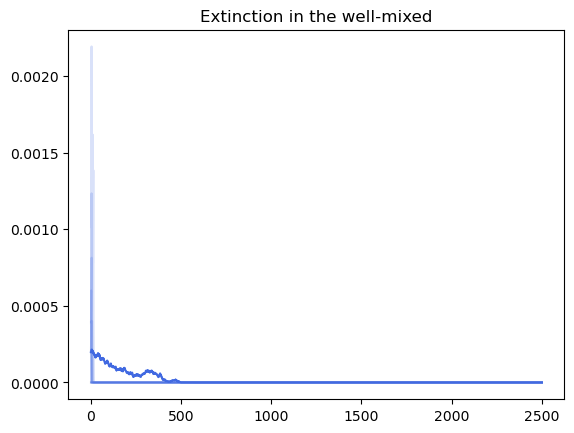

In [94]:
plt.plot(np.arange(1,x+1,1),wm_fix,color=leaf2)
for i in range(10):
    plt.plot(np.arange(1,x+1,1),wm_fix_list[i],color=leaf2,alpha=0.2)
plt.title('Fixation in the well-mixed')
plt.show()

plt.plot(np.arange(1,x+1,1),wm_ex,color=leaf2)
for i in range(10):
    plt.plot(np.arange(1,x+1,1),wm_ex_list[i],color=leaf2,alpha=0.2)
plt.title('Extinction in the well-mixed')
plt.show()